In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

from statsmodels.tsa.api import Holt

from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv(r"C:\PG_DBDA\Advance analytics classwork\Advanced_Analytics\Datasets\BUNDESBANK-BBK01_WT5511.csv")
df

,Date,Value
0,30-04-1968,39.10
1,31-05-1968,42.00
2,30-06-1968,40.95
3,31-07-1968,38.90
4,31-08-1968,39.85
...,...,...
572,31-12-2015,1062.25
573,31-01-2016,1112.90
574,29-02-2016,1234.15
575,31-03-2016,1233.60


In [4]:
###################### PArtitioning of data ####################################
y = df['Value']
y_train = df['Value'][:-12]
y_test = df['Value'][-12:]

In [5]:
print(y_test)

565    1190.40
566    1175.00
567    1080.05
568    1125.50
569    1122.50
570    1147.75
571    1055.65
572    1062.25
573    1112.90
574    1234.15
575    1233.60
576    1237.70
Name: Value, dtype: float64


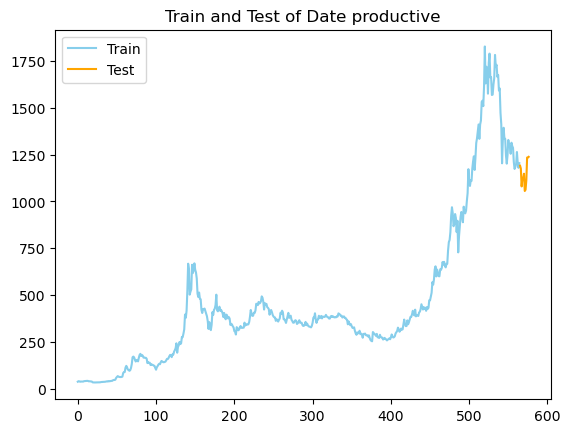

In [6]:
plt.plot(y_train, color = 'skyblue', label = 'Train')
plt.plot(y_test, color = 'orange', label = 'Test')
plt.legend(loc = 'best')
plt.title("Train and Test of Date productive")
plt.show()

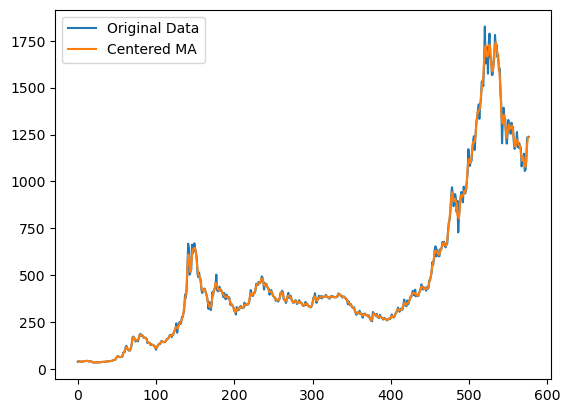

In [7]:
################################## Centered MA #####################################################
fcast = y.rolling(3,center=True).mean()
plt.plot(y, label='Original Data')
plt.plot(fcast, label='Centered MA')
plt.legend(loc='best')
plt.show()

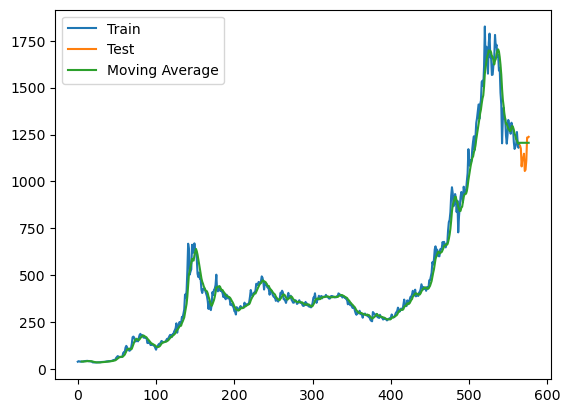

In [8]:
############################## Trailing MA ####################################
span=6
fcast = y_train.rolling(span).mean()
last_val = fcast.iloc[-1]
MA_series = pd.Series(last_val.repeat(len(y_test)))
MA_fcast = pd.concat([fcast,MA_series],ignore_index=True)
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(MA_fcast, label='Moving Average')
plt.legend(loc='best')
plt.show()

In [9]:
#### Evaluating

rmse = np.sqrt(mean_squared_error(y_test, MA_series))
print("RMSE =",rmse)

RMSE = 85.81127669679147


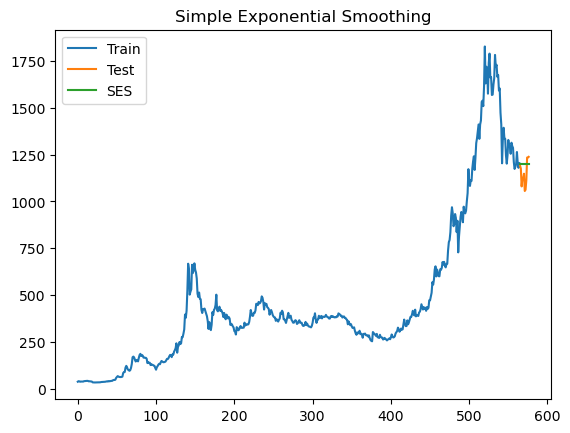

In [11]:
###################### Simple Exponential Smoothing ##########################################
alpha = 0.1
fit1 = SimpleExpSmoothing(y_train).fit()
fcast1 = fit1.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast1, label = 'SES')
plt.legend(loc = 'best')
plt.title("Simple Exponential Smoothing")
plt.show()

In [12]:
# EVALUATING..###################################
# lower rmse is preferred, as it signifies the error

rmse = np.sqrt(mean_squared_error(y_test, fcast1))
print("RMSE = ", rmse)

RMSE =  83.13336746404666


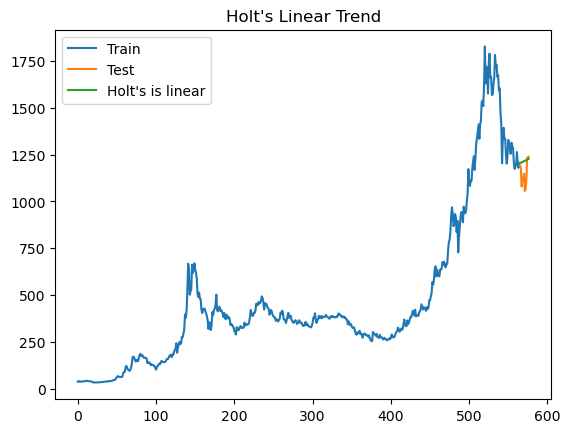

In [15]:
########## Holt's Linear Trend #########################
alpha = 0.1
beta = 0.9
fit2 = Holt(y_train).fit()
fcast2 = fit2.forecast(len(y_test))

plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Holt's is linear")
plt.legend(loc = 'best')
plt.title("Holt's Linear Trend")
plt.show()


In [16]:
# EVALUATING..###################################
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE = ", rmse)

RMSE =  91.02464118067908


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


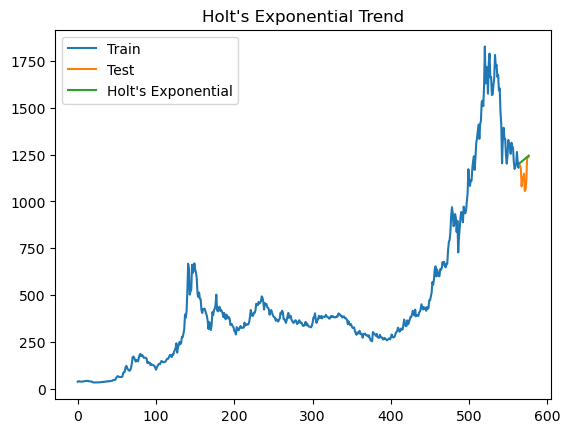

In [38]:
########## Holt's Exponential trend ####################
#alpha = 0.1
#beta = 0.9
fit2 = Holt(y_train, exponential = True).fit()
fcast2 = fit2.forecast(len(y_test))

plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Holt's Exponential")
plt.legend(loc = 'best')
plt.title("Holt's Exponential Trend")
plt.show()

In [39]:
# EVALUATING..#########
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE = ", rmse)


RMSE =  97.52897893824553


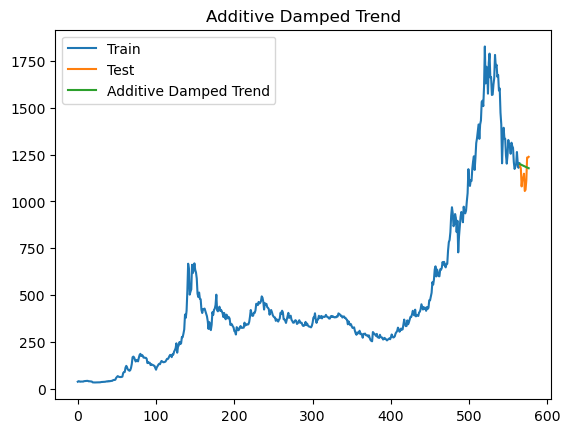

In [19]:
############# Additive Damped Trend ###########################
alpha=0.1
beta=0.8
phi=0.2
fit2 = Holt(y_train,damped_trend=True).fit()
fcast2 = fit2.forecast(len(y_test))

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(fcast2, label="Additive Damped Trend")
plt.legend(loc='best')
plt.title("Additive Damped Trend")
plt.show()

In [20]:
# Evaluating.. ############
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE = ", rmse)

RMSE =  76.94703360809321


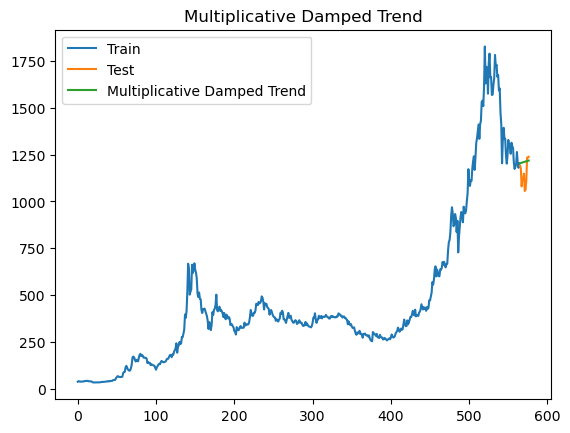

In [21]:
########## Multiplicative Damped Trend ######################
alpha=0.1
beta=0.8
phi=0.2
fit2 = Holt(y_train,damped_trend=True,exponential=True).fit()
fcast2 = fit2.forecast(len(y_test))

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(fcast2, label="Multiplicative Damped Trend")
plt.legend(loc='best')
plt.title("Multiplicative Damped Trend")
plt.show()

In [22]:
#### Evaluating ##################
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE =",rmse)

RMSE = 88.19501261477068


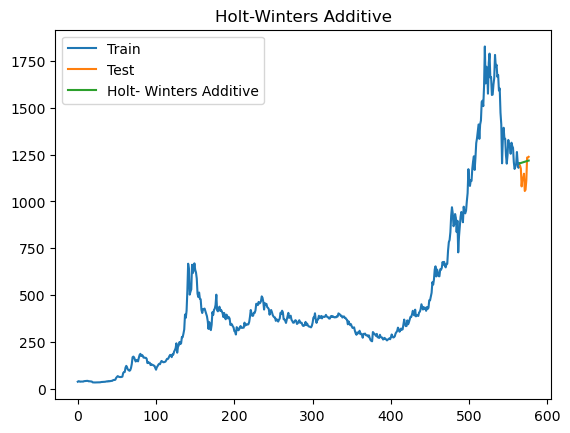

In [23]:
############# Holt- Winters Additive #######################
alpha = 0.1
beta = 0.8
gamma = 0.3
fit3 = ExponentialSmoothing(y_train, seasonal_periods = 12,
                           trend = 'add', seasonal = 'add').fit()
fcast3 = fit3.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Holt- Winters Additive")
plt.legend(loc = 'best')
plt.title("Holt-Winters Additive")
plt.show()

In [24]:
# Evaluating..#############
rmse = np.sqrt(mean_squared_error(y_test, fcast3))
print("RMSE = ", rmse)

RMSE =  99.15386717659918


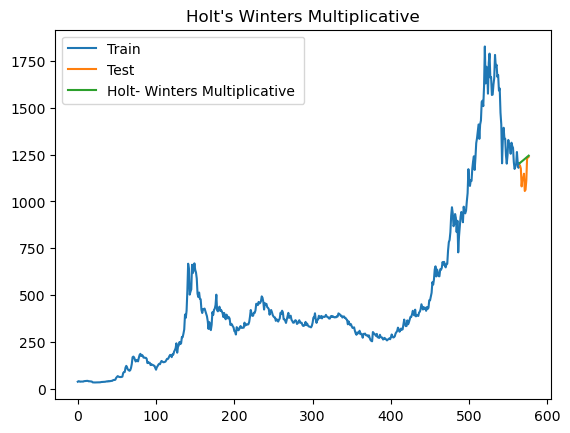

In [40]:
############# Holt-Winters Multiplicative #############
#alpha = 0.1
#beta = 0.8
#gamma = 0.3
fit3 = ExponentialSmoothing(y_train, seasonal_periods = 12,
                           trend = 'add', seasonal = 'mul').fit()
fcast3 = fit3.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Holt- Winters Multiplicative ")
plt.legend(loc = 'best')
plt.title("Holt's Winters Multiplicative")
plt.show()

In [41]:
# Evaluating.. ###################
rmse = np.sqrt(mean_squared_error(y_test, fcast3))
print("RMSE = ", rmse)

RMSE =  100.23972760843765


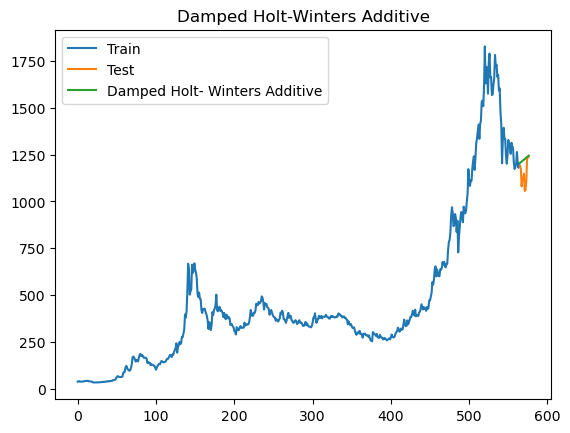

In [42]:
# Damped Holt- Winters Additive ####################
#alpha = 0.1
#beta = 0.8
#gamma = 0.3
fit3 = ExponentialSmoothing(y_train, seasonal_periods = 12, damped_trend = True,
                           trend = 'add', seasonal = 'add').fit()
fcast3 = fit3.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Damped Holt- Winters Additive")
plt.legend(loc = 'best')
plt.title("Damped Holt-Winters Additive")
plt.show()

In [29]:
# Evaluating..####################
rmse = np.sqrt(mean_squared_error(y_test, fcast3))
print("RMSE = ", rmse)

RMSE =  76.80335846745862


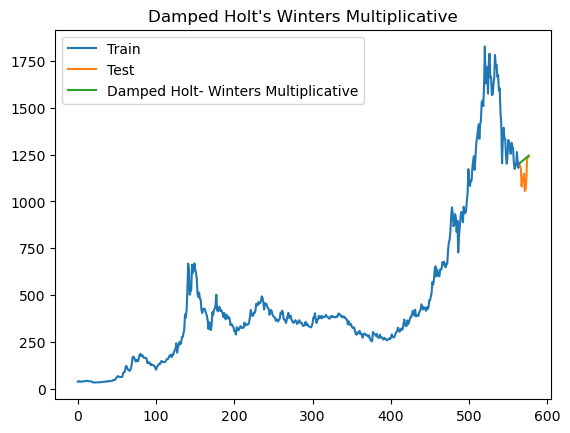

In [43]:
# Damped Holts Winters Multiplicative #################
#alpha = 0.1
#beta = 0.8
#gamma = 0.3
fit3 = ExponentialSmoothing(y_train, seasonal_periods = 12, damped_trend = True,
                           trend = 'add', seasonal = 'mul').fit()
fcast3 = fit3.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Damped Holt- Winters Multiplicative")
plt.legend(loc = 'best')
plt.title("Damped Holt's Winters Multiplicative")
plt.show()

In [44]:
# Evaluating..###############
rmse = np.sqrt(mean_squared_error(y_test, fcast3))
print("RMSE = ", rmse)

RMSE =  79.11025444812225
